In [29]:
import joblib
joblib.cpu_count()
exp_path_name="WACA-kNN"

Dataset [link](https://can01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdrive.google.com%2Fdrive%2Ffolders%2F1-6sd6E3cL8uWdNeO4xiXxLbTSYXSTiVr%3Fusp%3Dsharing&data=04%7C01%7Carash.gholami%40queensu.ca%7C92b180b5b67d475fb70e08d87b7f4305%7Cd61ecb3b38b142d582c4efb2838b925c%7C1%7C0%7C637395133804367020%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C1000&sdata=1ieR3E8llMblC0QMBtx1%2FpHS71RQuCxzdNQLmH0HJVU%3D&reserved=0)

Explanation: There are **49** users' data here. Naming is in the format of Username_ExperimentNumber. Please also note that it is unprocessed raw data, which includes a lot of noise etc. 

Experiment-1: **20** participants are involved in this task and the participants were asked to type **a story** from **a set** of short and simple stories from the American Literature https://americanliterature.com/100-great-short-stories for **four minutes**. The story was chosen randomly by the participants.

Experiment-2: 20 participants are involved in this task and for this data set, all the participants were asked to type the **same text** https://en.wikipedia.org/wiki/The_Adventures_of_Tom_Sawyer for **four minutes**. For each participant, almost the same amount of data is collected as Experiment-1. This dataset is important to be able to measure the quality of the features. The collection of this dataset is quite realistic since in a real case the users could be also asked to type a given text during their CA sessions. 

Experiment-3: The participants are asked to type **10 different pangram sentences**. Pangrams sentences contain** all 26 letters** of the alphabet. This data set is used to test how the **letter distribution** of text affects the result.

Experiment-4: **34** participants are involved in this task and the participants were instructed to imitate someone else's typing pattern by watching the prerecorded video of the other person. For these experiments, one of the participants was recorded on video while typing a short and simple sentence for **15 seconds** from a perspective that the hand motions, smartwatch, keyboard, and the screen could be seen. Although it was not required, the perspective allowed to infer what the victim was typing by watching. This dataset was primarily used to analyze the **attacking scenarios**. It is left to the participant to type the exact same text or imitate the hand movement of the victim.

-----------------------

I realized that you have mostly 4s and 10s as values on column A, but I also found 2s. What does column A represent? 
A represents the sensor type:
 
**10 for the accelerometer
4 for the gyroscope**
2 for the magnetic field sensor

You can find more info about sensors and constant values that are used to define the sensor type in these links:
- https://developer.android.com/guide/topics/sensors/sensors_overview
- https://developer.android.com/reference/android/hardware/Sensor#TYPE_LINEAR_ACCELERATION

Normally, I only collected and used accelerometer and gyroscope sensor data. Magnetometer data should not be in the dataset. If there is, that means it is an **outlier**.
 
Is column B the time stamp, is it recorded at 100HZ?

In an android app, you can set the sampling rate "SENSOR_DELAY_NORMAL, SENSOR_DELAY_UI, SENSOR_DELAY_GAME, or SENSOR_DELAY_FASTEST " 

As far as I remember I used **"SENSOR_DELAY_FASTEST" for all sensors**, but in practice, I had a lot of issues regarding this. They **don't give a constant sampling rate**. Every time I used they were giving different sampling rates. They were giving different sampling rates for two sessions of the same user, for different users, or for different sensors. Therefore, I would recommend using the one in the practice, which you can calculate using the timestamp and the sample count. 

On the paper you said you have recorded both accelerometer and gyro data; but you seem to only have one of them at a time on columns C, D, and F. I am guessing 10 on column A represents accelerometer and 4 gyro, but I could be wrong. 
Also, some rows have more columns, and start with 11 on column A. What do those represent?
Please see the explanation above. 
 

In short, I would really appreciate it if you could let me know information I need to know for working with the data.

Also, as these sensors were giving me a lot of headaches because they are really not stable, I needed to perform a lot of preprocessing. I **cleaned the outliers** before further processing. I also applied some other filtering techniques such as **moving average** to obtain more smooth data. Moreover, I needed to **clean the part the users are not performing typing operation from the beginning and end**, which you can see if you plot the values, i.e., the **user stops meaning no value and then big deviations, where the user takes off the smartwatch**.

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
# !pip install --upgrade pip

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dataclasses
from dataclasses import asdict
from tqdm import tqdm
import warnings
import random
import time

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns



%run ./Classification_utility-functions.ipynb
%run ./SEED-CONSTANTS.ipynb

np.random.seed(SEED)
print(f"Numpy Seed was set to: {SEED}")

print("Setup Complete")

SEED: 567
--------------------SEED and CONSTANTS imported--------------------
SEED: 567
Python 3.9.10
EER: 0.333, Threshold: 0.600 <-- Arbitrary case
EER: 0.000, Threshold: 0.900 <-- Best case
EER: 1.000, Threshold: 0.900 <-- Worse case
EER: 0.400, Threshold: 0.200 <-- Worse case
EER: 0.167, Threshold: 0.600 <-- Arbitrary case
EER: 0.000, Threshold: 0.900 <-- Best case
EER: 1.000, Threshold: 0.900 <-- Worse case
EER: 0.333, Threshold: 1.000 <-- Worse case
--------------------Utility functions imported--------------------
SEED: 567
--------------------SEED and CONSTANTS imported--------------------
SEED: 567
Python 3.9.10
--------------------Preprocessing utility functions imported--------------------
SEED: 567
--------------------SEED and CONSTANTS imported--------------------
SEED: 567
Python 3.9.10
--------------------Neural Networks utility functions imported--------------------
SEED: 567
--------------------SEED and CONSTANTS imported--------------------
SEED: 567
Python 3.9.10
EER

In [5]:
import sklearn
sklearn.__dir__()
sklearn.__version__

'1.0.2'

In [6]:
@dataclasses.dataclass
class ExperimentParameters:
    """Contains all relevant parameters to run an experiment."""

    name: str  # Name of Parameter set. Used as identifier for charts etc.
    frequency: int
    max_subjects: int
    max_test_subjects: int
        
    user_ids: list
    num_sample_points_per_exp: int
    exp_begin_cutoff_idx: int
    exp_end_cutoff_idx: int
        
    
    seconds_per_subject_train: float
    seconds_per_subject_test: float
    window_size: int  # After resampling
    ocsvm_step_width: int  # After resampling
    scaler: str  # StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler, RobustScaler, PowerTransformer
    scaler_scope: str  # {"subject", "session"}
    scaler_global: bool  # fit transform scale on all data (True) or fit on training only (False)
    ocsvm_kernel: str # ocsvm kernel
    ocsvm_nu: float  # Best value found in random search, used for final model
    ocsvm_gamma: float  # Best value found in random search, used for final model
    feature_cols: list  # Columns used as features
    exclude_subjects: list  # Don't load data from those users
        
    # Calculated values
    def __post_init__(self):
        # HDF key of table:
        self.table_name = f"sensors_{self.frequency}hz"

        

# INSTANCES
# ===========================================================

# NAIVE_APPROACH
# -----------------------------------------------------------
NAIVE_MINMAX_OCSVM = ExperimentParameters(
    name="NAIVE-MINMAX_OCSVM",
    frequency=100,
    max_subjects=29,
    max_test_subjects=10,
    user_ids = [1, 2, 3, 4, 5, 6, 7, 8, 19, 21, 22, 26, 27, 28, 29, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49],
    num_sample_points_per_exp=21000,
    exp_begin_cutoff_idx=500,
    exp_end_cutoff_idx=-500,
    seconds_per_subject_train=210,
    seconds_per_subject_test=210,    
    window_size=250,
    ocsvm_step_width=250,
    scaler="minmax",
    scaler_scope="subject",
    scaler_global=True,
    ocsvm_kernel="rbf",
    ocsvm_nu=None,
    ocsvm_gamma=None,
    feature_cols=[
        "x_a",
        "y_a",
        "z_a",
        "x_g",
        "y_g",
        "z_g",
    ],
    exclude_subjects=[],
)

# VALID_APPROACH
# -----------------------------------------------------------
VALID_MINMAX_OCSVM = dataclasses.replace(
    NAIVE_MINMAX_OCSVM,
    name="VALID-MINMAX-OCSVM",
    scaler_global=False,
    ocsvm_nu=0.165,
    ocsvm_gamma=0.039,
)

# NAIVE_ROBUST_APPROACH
# -----------------------------------------------------------
NAIVE_ROBUST_OCSVM = dataclasses.replace(
    NAIVE_MINMAX_OCSVM,
    name="NAIVE-ROBUST-OCSVM",
    scaler="robust",
    scaler_global=True,
    ocsvm_nu=0.153,
    ocsvm_gamma=0.091,  # below median, selected by chart
)

# ROBUST_APPROACH (VALID)
# -----------------------------------------------------------
VALID_ROBUST_OCSVM = dataclasses.replace(
    NAIVE_MINMAX_OCSVM,
    name="VALID-ROBUST-OCSVM",
    scaler="RobustScaler",
    scaler_global=False,
    ocsvm_nu=0.037,
    ocsvm_gamma= 0.001,
)
# NORMALIZER_APPROACH (VALID)
# -----------------------------------------------------------
VALID_NORMALIZER_OCSVM = dataclasses.replace(
    NAIVE_MINMAX_OCSVM,
    name="VALID-NORMALIZER-OCSVM",
    scaler="Normalizer",
    scaler_global=False,
    ocsvm_nu=0.074,
    ocsvm_gamma= 0.029,
)

In [7]:
P = VALID_ROBUST_OCSVM
# P = VALID_NORMALIZER_OCSVM
n_neighbors_params = np.arange(1,20) 


In [8]:
utils_ppp(P)

,Value
name,VALID-ROBUST-OCSVM
frequency,100
max_subjects,29
max_test_subjects,10
user_ids,"[1, 2, 3, 4, 5, 6, 7, 8, 19, 21, 22, 26, 27, 2..."
num_sample_points_per_exp,21000
exp_begin_cutoff_idx,500
exp_end_cutoff_idx,-500
seconds_per_subject_train,210
seconds_per_subject_test,210


In [9]:
utils_eer_scorer

make_scorer(utils_eer, greater_is_better=False)

In [10]:
#include 47 later
# user_ids = [9]
df_exps_dict = load_data_frames(P.user_ids, P.exp_begin_cutoff_idx, P.exp_end_cutoff_idx, P.num_sample_points_per_exp)
raw_dfList_exp1, raw_dfList_exp2 = df_exps_dict['dfList_exp1'], df_exps_dict['dfList_exp2']

Loading exp1 data:
1) accel_count: 28388, gyro_count: 31997
2) accel_count: 26010, gyro_count: 28954
3) accel_count: 28227, gyro_count: 31814
4) accel_count: 24860, gyro_count: 26105
5) accel_count: 24270, gyro_count: 24347
6) accel_count: 25012, gyro_count: 25060
7) accel_count: 25301, gyro_count: 25382
8) accel_count: 21975, gyro_count: 21658
19) accel_count: 24110, gyro_count: 25050
21) accel_count: 24326, gyro_count: 23809
22) accel_count: 29123, gyro_count: 28724
26) accel_count: 23148, gyro_count: 24291
27) accel_count: 24299, gyro_count: 23589
28) accel_count: 23807, gyro_count: 24523
29) accel_count: 24030, gyro_count: 23457
35) accel_count: 24388, gyro_count: 23673
36) accel_count: 24228, gyro_count: 24208
37) accel_count: 31945, gyro_count: 31816
38) accel_count: 22135, gyro_count: 22327
39) accel_count: 23573, gyro_count: 23459
40) accel_count: 23057, gyro_count: 24296
41) accel_count: 24102, gyro_count: 23681
42) accel_count: 24074, gyro_count: 24328
43) accel_count: 22631,

# Butterworth+EMA

<AxesSubplot:>

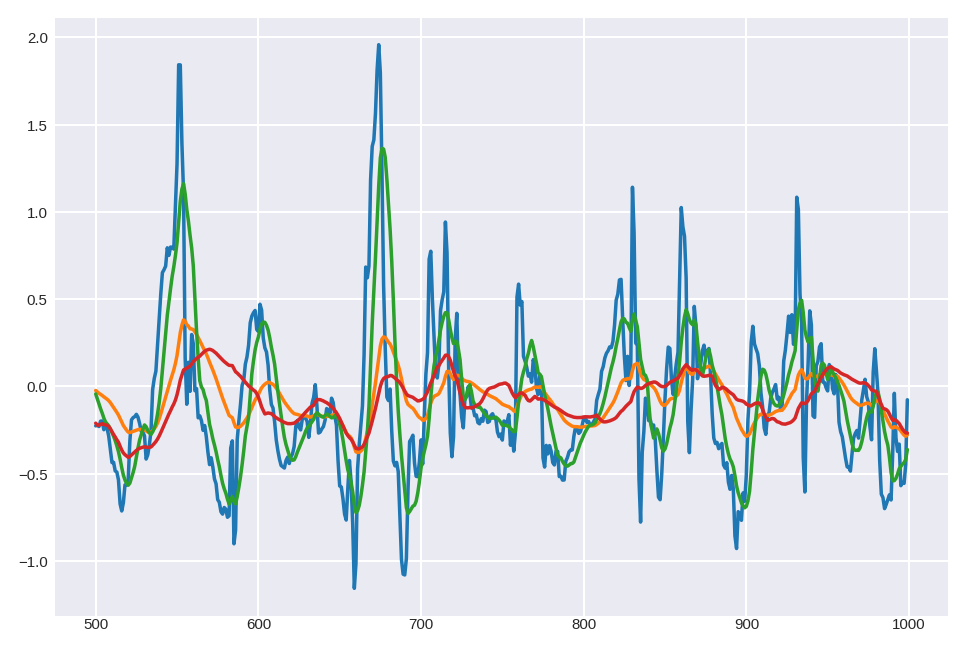

In [16]:
P.span=49
P.smoothing = "FFT+EMA"
# raw_dfList_exp1 = dfList_exp1
# raw_dfList_exp2 = dfList_exp2
P.cut_off_freq=42
ffted_dfList_exp1 = get_ffted_dfList(raw_dfList_exp1, cut_off_freq=P.cut_off_freq, filter_order=10)
ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=10)
ffted_dfList_exp2[0]['x_a'][500:1000].plot()
EMAed_dfList_exp1 = get_EMAed_dfList(ffted_dfList_exp1, span=P.span)
EMAed_dfList_exp2 = get_EMAed_dfList(ffted_dfList_exp2, span=P.span)
EMAed_dfList_exp2[0]['x_a'][500:1000].plot()

dfList_exp1 = ffted_dfList_exp1
dfList_exp2 = ffted_dfList_exp2

dfList_exp1 =EMAed_dfList_exp1
dfList_exp2 =EMAed_dfList_exp2

SMAed_dfList_exp1 = get_SMAed_dfList(ffted_dfList_exp1, winsize=10)
SMAed_dfList_exp2 = get_SMAed_dfList(ffted_dfList_exp2, winsize=10)
SMAed_dfList_exp2[0]['x_a'][500:1000].plot()

raw_dfList_exp2[0]['x_a'][500:1000].rolling(window=50, min_periods=0).mean().plot()

In [17]:
i=0
raw_dfList_exp2[i]['x_a'][500:1000].rolling(window=10, min_periods=0, closed="both").mean()

500   -0.211201
501   -0.222568
502   -0.222900
503   -0.217521
504   -0.214294
         ...   
995   -0.480356
996   -0.468062
997   -0.455767
998   -0.438447
999   -0.388494
Name: x_a, Length: 500, dtype: float64

In [18]:
raw_dfList_exp2[i]['x_a'][500:1000]

500   -0.211201
501   -0.233935
502   -0.223566
503   -0.201385
504   -0.201385
         ...   
995   -0.557577
996   -0.557577
997   -0.557577
998   -0.437594
999   -0.096048
Name: x_a, Length: 500, dtype: float32

In [19]:
# i=0
# dfList_exp1[i][['x_a']].plot(figsize=(30, 6))
# dfList_exp1[i][['y_a']].plot(figsize=(30, 6))
# dfList_exp1[i][['z_a']].plot(figsize=(30, 6))
# dfList_exp1[i][['x_g']].plot(figsize=(30, 6))
# dfList_exp1[i][['y_g']].plot(figsize=(30, 6))
# dfList_exp1[i][['z_g']].plot(figsize=(30, 6))

# dfList_exp2[i][['x_a']].plot(figsize=(30, 6))
# dfList_exp2[i][['y_a']].plot(figsize=(30, 6))
# dfList_exp2[i][['z_a']].plot(figsize=(30, 6))
# dfList_exp2[i][['x_g']].plot(figsize=(30, 6))
# dfList_exp2[i][['y_g']].plot(figsize=(30, 6))
# dfList_exp2[i][['z_g']].plot(figsize=(30, 6))
# exp1 idx 10 has corrupted data frist 50 sec
# exp2 idx 12 has some artifacts first 12.5 sec
# exp1 idx 17 has some artifacts first 75 sec
# exp2 idx 23 has some artifacts last 6.5 sec

In [20]:
randomized_data_idx = list(range(len(P.user_ids)))
random.Random(SEED).shuffle(randomized_data_idx)
split_idx = 2 * (len(randomized_data_idx)//3) + 1
train_set = randomized_data_idx[: split_idx]
test_set = randomized_data_idx[split_idx: ]
# train_set = randomized_data_idx
print(f"train_set: {train_set}\ntest_set: {test_set}")
# train_set = test_set
# test_set = train_set
print(f"train_set: {train_set}\ntest_set: {test_set}")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]
train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


Loading exp1 data:
47) accel_count: 22777, gyro_count: 22226
Loading exp2 data:
47) accel_count: 17718, gyro_count: 18353


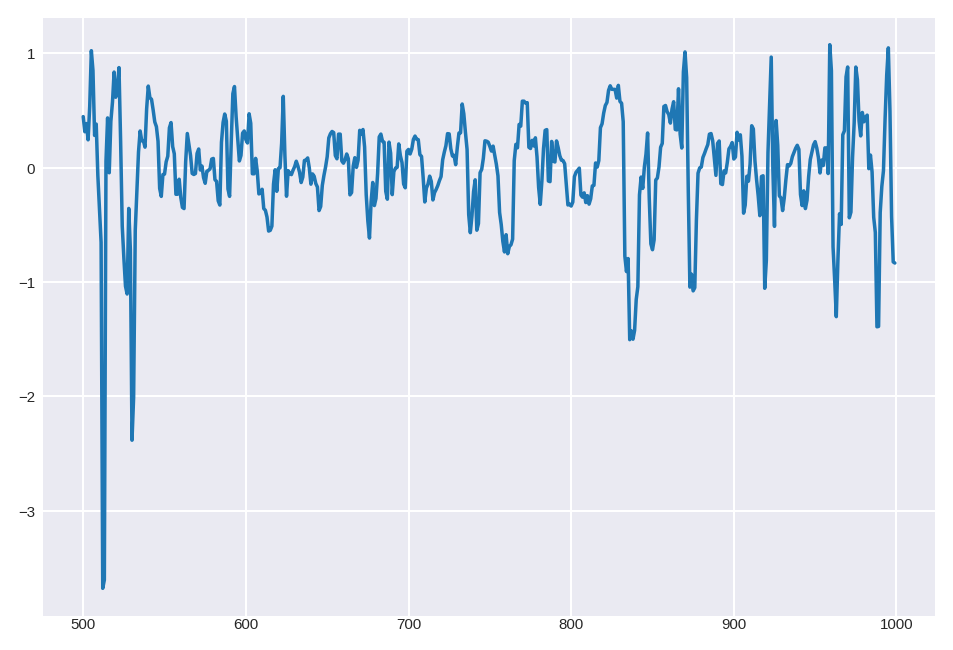

SEED: 567
--------------------SEED and CONSTANTS imported--------------------
SEED: 567
Python 3.9.10
EER: 0.333, Threshold: 0.600 <-- Arbitrary case
EER: 0.000, Threshold: 0.900 <-- Best case
EER: 1.000, Threshold: 0.900 <-- Worse case
EER: 0.400, Threshold: 0.200 <-- Worse case
EER: 0.167, Threshold: 0.600 <-- Arbitrary case
EER: 0.000, Threshold: 0.900 <-- Best case
EER: 1.000, Threshold: 0.900 <-- Worse case
EER: 0.333, Threshold: 1.000 <-- Worse case
--------------------Utility functions imported--------------------
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 84
len_exp2_user_47: 72
user_47_idx: 29
np.unique(all_user_set): [ 1  2  3  4  5  6  7  8 19 21 22 26 27 28 29 35 36 37 38 39 40 41 42 43
 44 45 46 48 49]
X_exp1_dict.keys(): dict_keys([7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 29])
X_exp2_dict.keys(): dict_keys([7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 29])
fitted_scaler_

In [21]:
num_sample_points_per_exp_user_47 = 18000
df_exps_dict_user_47 = load_data_frames([47], P.exp_begin_cutoff_idx, P.exp_end_cutoff_idx, num_sample_points_per_exp_user_47)
dfList_exp1_user_47, dfList_exp2_user_47 = df_exps_dict_user_47['dfList_exp1'], df_exps_dict_user_47['dfList_exp2']

raw_dfList_exp1_user_47 = dfList_exp1_user_47
raw_dfList_exp2_user_47 = dfList_exp2_user_47

ffted_dfList_exp1_user_47 = get_ffted_dfList(raw_dfList_exp1_user_47, cut_off_freq=P.cut_off_freq, filter_order=10, filtfilt=1)
ffted_dfList_exp2_user_47 = get_ffted_dfList(raw_dfList_exp2_user_47, cut_off_freq=P.cut_off_freq, filter_order=10, filtfilt=1)
ffted_dfList_exp2_user_47[0]['x_a'][500:1000].plot()

dfList_exp1_user_47 = ffted_dfList_exp1_user_47
dfList_exp2_user_47 = ffted_dfList_exp2_user_47

# EMAed_dfList_exp1_user_47 = get_EMAed_dfList(ffted_dfList_exp1_user_47, span=P.span)
# EMAed_dfList_exp2_user_47 = get_EMAed_dfList(ffted_dfList_exp2_user_47, span=P.span)
# EMAed_dfList_exp2_user_47[0]['EMA_x_a'][500:1000].plot()

# dfList_exp1_user_47 = EMAed_dfList_exp1_user_47
# dfList_exp2_user_47 = EMAed_dfList_exp2_user_47

%run ./utility-functions.ipynb


# preparing train data
X_train_exp1_dict, X_train_exp2_dict, fitted_scaler_train_exp2_dict=get_raw_windows(dfList_exp1, dfList_exp2, P.window_size, P.ocsvm_step_width, train_set, 
                                                                    P.scaler, P.num_sample_points_per_exp, EMA_per_win_span=None, SMA_per_win_winsize=None)

X_train_exp1_dict_user_47, X_train_exp2_dict_user_47, fitted_scaler_train_exp2_dict_user_47=get_raw_windows_user_47(dfList_exp1_user_47, dfList_exp2_user_47, P.window_size, P.ocsvm_step_width, 
                                                                                                                    scaler=P.scaler, num_sample_points_per_exp=P.num_sample_points_per_exp, 
                                                                                                                    EMA_per_win_span=None, SMA_per_win_winsize=None)

X_train_exp1_dict, X_train_exp2_dict, fitted_scaler_train_exp2_dict=append_user_47_to_data(X_train_exp1_dict, X_train_exp2_dict, fitted_scaler_train_exp2_dict, P.user_ids, 
                                                                                           X_train_exp1_dict_user_47, X_train_exp2_dict_user_47, fitted_scaler_train_exp2_dict_user_47, verbose=1)

print(f"len(exp1_df_train_dict): {len(X_train_exp1_dict)}")
print(f"len(exp2_df_train_dict): {len(X_train_exp2_dict)}")


# preparing test data
X_test_exp1_dict, X_test_exp2_dict, fitted_scaler_test_exp2_dict=get_raw_windows(dfList_exp1, dfList_exp2, P.window_size, P.ocsvm_step_width, test_set, 
                                                                    P.scaler, P.num_sample_points_per_exp, EMA_per_win_span=None, SMA_per_win_winsize=None)

print(f"len(X_test_exp1_dict): {len(X_test_exp1_dict)}")
print(f"len(X_test_exp2_dict): {len(X_test_exp2_dict)}")

In [22]:
print(f"train_set: {train_set}")
# print(f"X_exp1_train_dic: {X_exp1_train_dic.keys()}")
# print(f"X_exp2_train_dic: {X_exp2_train_dic.keys()}")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5]


In [23]:
print(f"test_set: {test_set}")
# print(f"X_exp1_test_dic: {X_exp1_test_dic.keys()}")
# print(f"X_exp2_test_dic: {X_exp2_test_dic.keys()}")

test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


In [183]:
# OCSVM_test_train_WACA_features_dic[0].shape

In [184]:
# plot_EER_distro(Mean_EER_df, 500)

In [185]:
train_set
P.user_ids
P.scaler="RobustScaler"

In [186]:
P.Butter_per_win_argdict={
                        "filter_order": 10,
                        "cut_off_freq": 27,
                        "sampling_freq": 100,
                        "filtfilt": 1,
                        }
train_set[:-19]
P.Butter_per_win_argdict=None
EMA_per_win_span=None
SMA_per_win_winsize=None
fitted_scaler_train_exp2_dict_user_47
fitted_scaler_train_exp2_dict

{7: RobustScaler(),
 24: RobustScaler(),
 8: RobustScaler(),
 11: RobustScaler(),
 13: RobustScaler(),
 19: RobustScaler(),
 28: RobustScaler(),
 21: RobustScaler(),
 26: RobustScaler(),
 3: RobustScaler(),
 20: RobustScaler(),
 22: RobustScaler(),
 6: RobustScaler(),
 25: RobustScaler(),
 16: RobustScaler(),
 1: RobustScaler(),
 17: RobustScaler(),
 27: RobustScaler(),
 5: RobustScaler(),
 29: RobustScaler()}

In [187]:
overlap=.5
window_size=2000
step_width = int(window_size * (1-overlap))
X_train_exp1_dict, X_train_exp2_dict, fitted_scaler_train_exp2_dict=get_raw_windows(dfList_exp1, dfList_exp2, window_size, step_width, train_set, P.scaler, P.num_sample_points_per_exp, 
                                                                                    EMA_per_win_span=EMA_per_win_span, SMA_per_win_winsize=SMA_per_win_winsize, Butter_per_win_argdict=P.Butter_per_win_argdict)

X_train_exp1_dict_user_47, X_train_exp2_dict_user_47, fitted_scaler_train_exp2_dict_user_47=get_raw_windows_user_47(dfList_exp1_user_47, dfList_exp2_user_47, window_size, step_width, scaler=P.scaler, 
                                                                                                                    num_sample_points_per_exp=P.num_sample_points_per_exp, EMA_per_win_span=EMA_per_win_span,
                                                                                                                    SMA_per_win_winsize=SMA_per_win_winsize, Butter_per_win_argdict=P.Butter_per_win_argdict)

X_train_exp1_dict, X_train_exp2_dict, fitted_scaler_train_exp2_dict=append_user_47_to_data(X_train_exp1_dict, X_train_exp2_dict, fitted_scaler_train_exp2_dict, P.user_ids, 
                                                                                           X_train_exp1_dict_user_47, X_train_exp2_dict_user_47, fitted_scaler_train_exp2_dict_user_47, verbose=1)

X_exp_train_dic = extract_WACA_features(X_train_exp1_dict, X_train_exp2_dict, fitted_scaler_train_exp2_dict)



len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
user_47_idx: 29
np.unique(all_user_set): [ 1  2  3  4  5  6  7  8 19 21 22 26 27 28 29 35 36 37 38 39 40 41 42 43
 44 45 46 48 49]
X_exp1_dict.keys(): dict_keys([7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 29])
X_exp2_dict.keys(): dict_keys([7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 29])
fitted_scaler_exp2_dict.keys(): dict_keys([7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 29])
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    6.4s remaining:   57.4s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    6.4s remaining:   36.5s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    6.5s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done   5 out of  2

In [188]:
# %run ./utility-functions.ipynb
n_neighbors=1
verbose=0
columns = ['window_size', "step_width", "scaler_clip", "Mean_EER"]
Mean_EER_df = pd.DataFrame(columns = columns)
# return X_exp_train_dic
columns = ['owner', "adv_user_id", "EER"]
EER_distro_df = pd.DataFrame(columns = columns)

EER_distro_df = make_EER_distro_df(X_exp_train_dic, n_neighbors=1, algorithm='brute', verbose=0)

y_col = "EER"
mean_col = EER_distro_df[y_col].mean()
Mean_EER = mean_col
Mean_EER_df_columns = ['window_size', "step_width", "scaler_clip", "Mean_EER"]
new_row = pd.DataFrame([[window_size, step_width, True, Mean_EER]], columns=Mean_EER_df_columns)
Mean_EER_df = pd.concat([Mean_EER_df, new_row])

In [189]:
# %run ./utility-functions.ipynb
EER_distro_df.EER.mean()

0.16158263319018773

In [190]:
dfList_dict={"dfList_exp1": dfList_exp1,
            "dfList_exp2": dfList_exp2,
            "dfList_exp1_user_47": dfList_exp1_user_47,
            "dfList_exp2_user_47": dfList_exp2_user_47,}
EER_distro_df

,owner,adv_user_id,EER
0,7,24,0.05
0,7,8,0.05
0,7,11,0.05
0,7,13,0.0
0,7,19,0.05
...,...,...,...
0,29,16,0.090909
0,29,1,0.090909
0,29,17,0.090909
0,29,27,0.090909


Overall mean: 0.1616


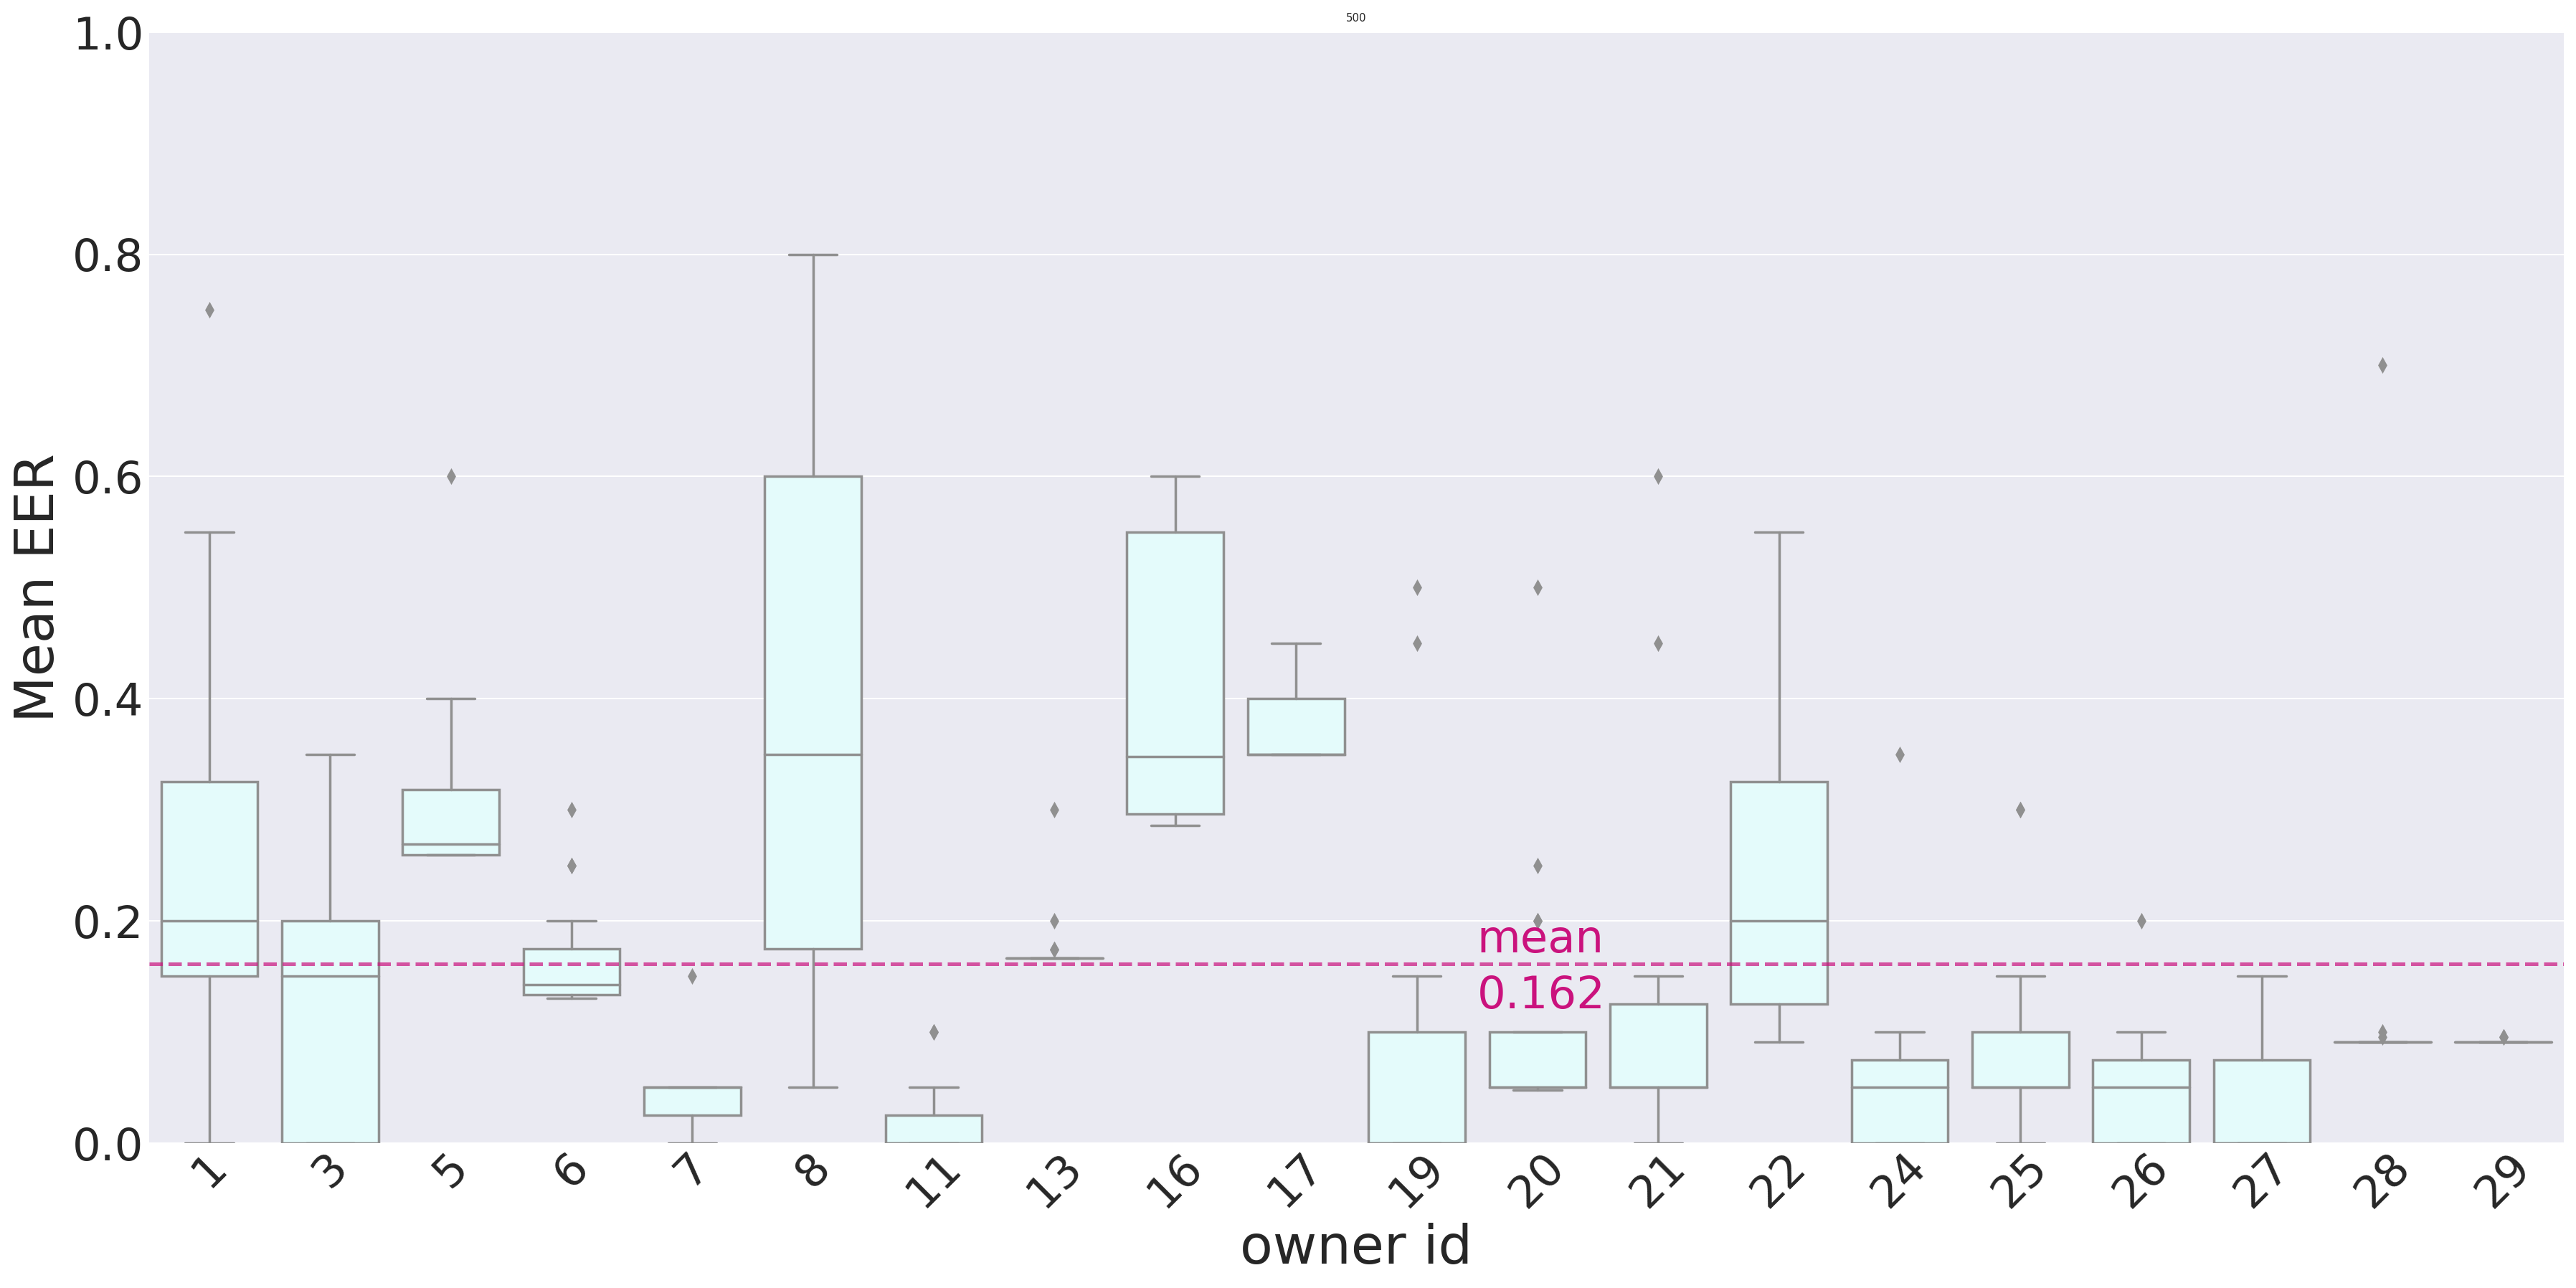

In [191]:
utils_plot_acc_eer_dist_thesis(EER_distro_df, "EER", 500, save_file_name=None, boxplot_color="lightcyan")


Overall mean: 0.1616


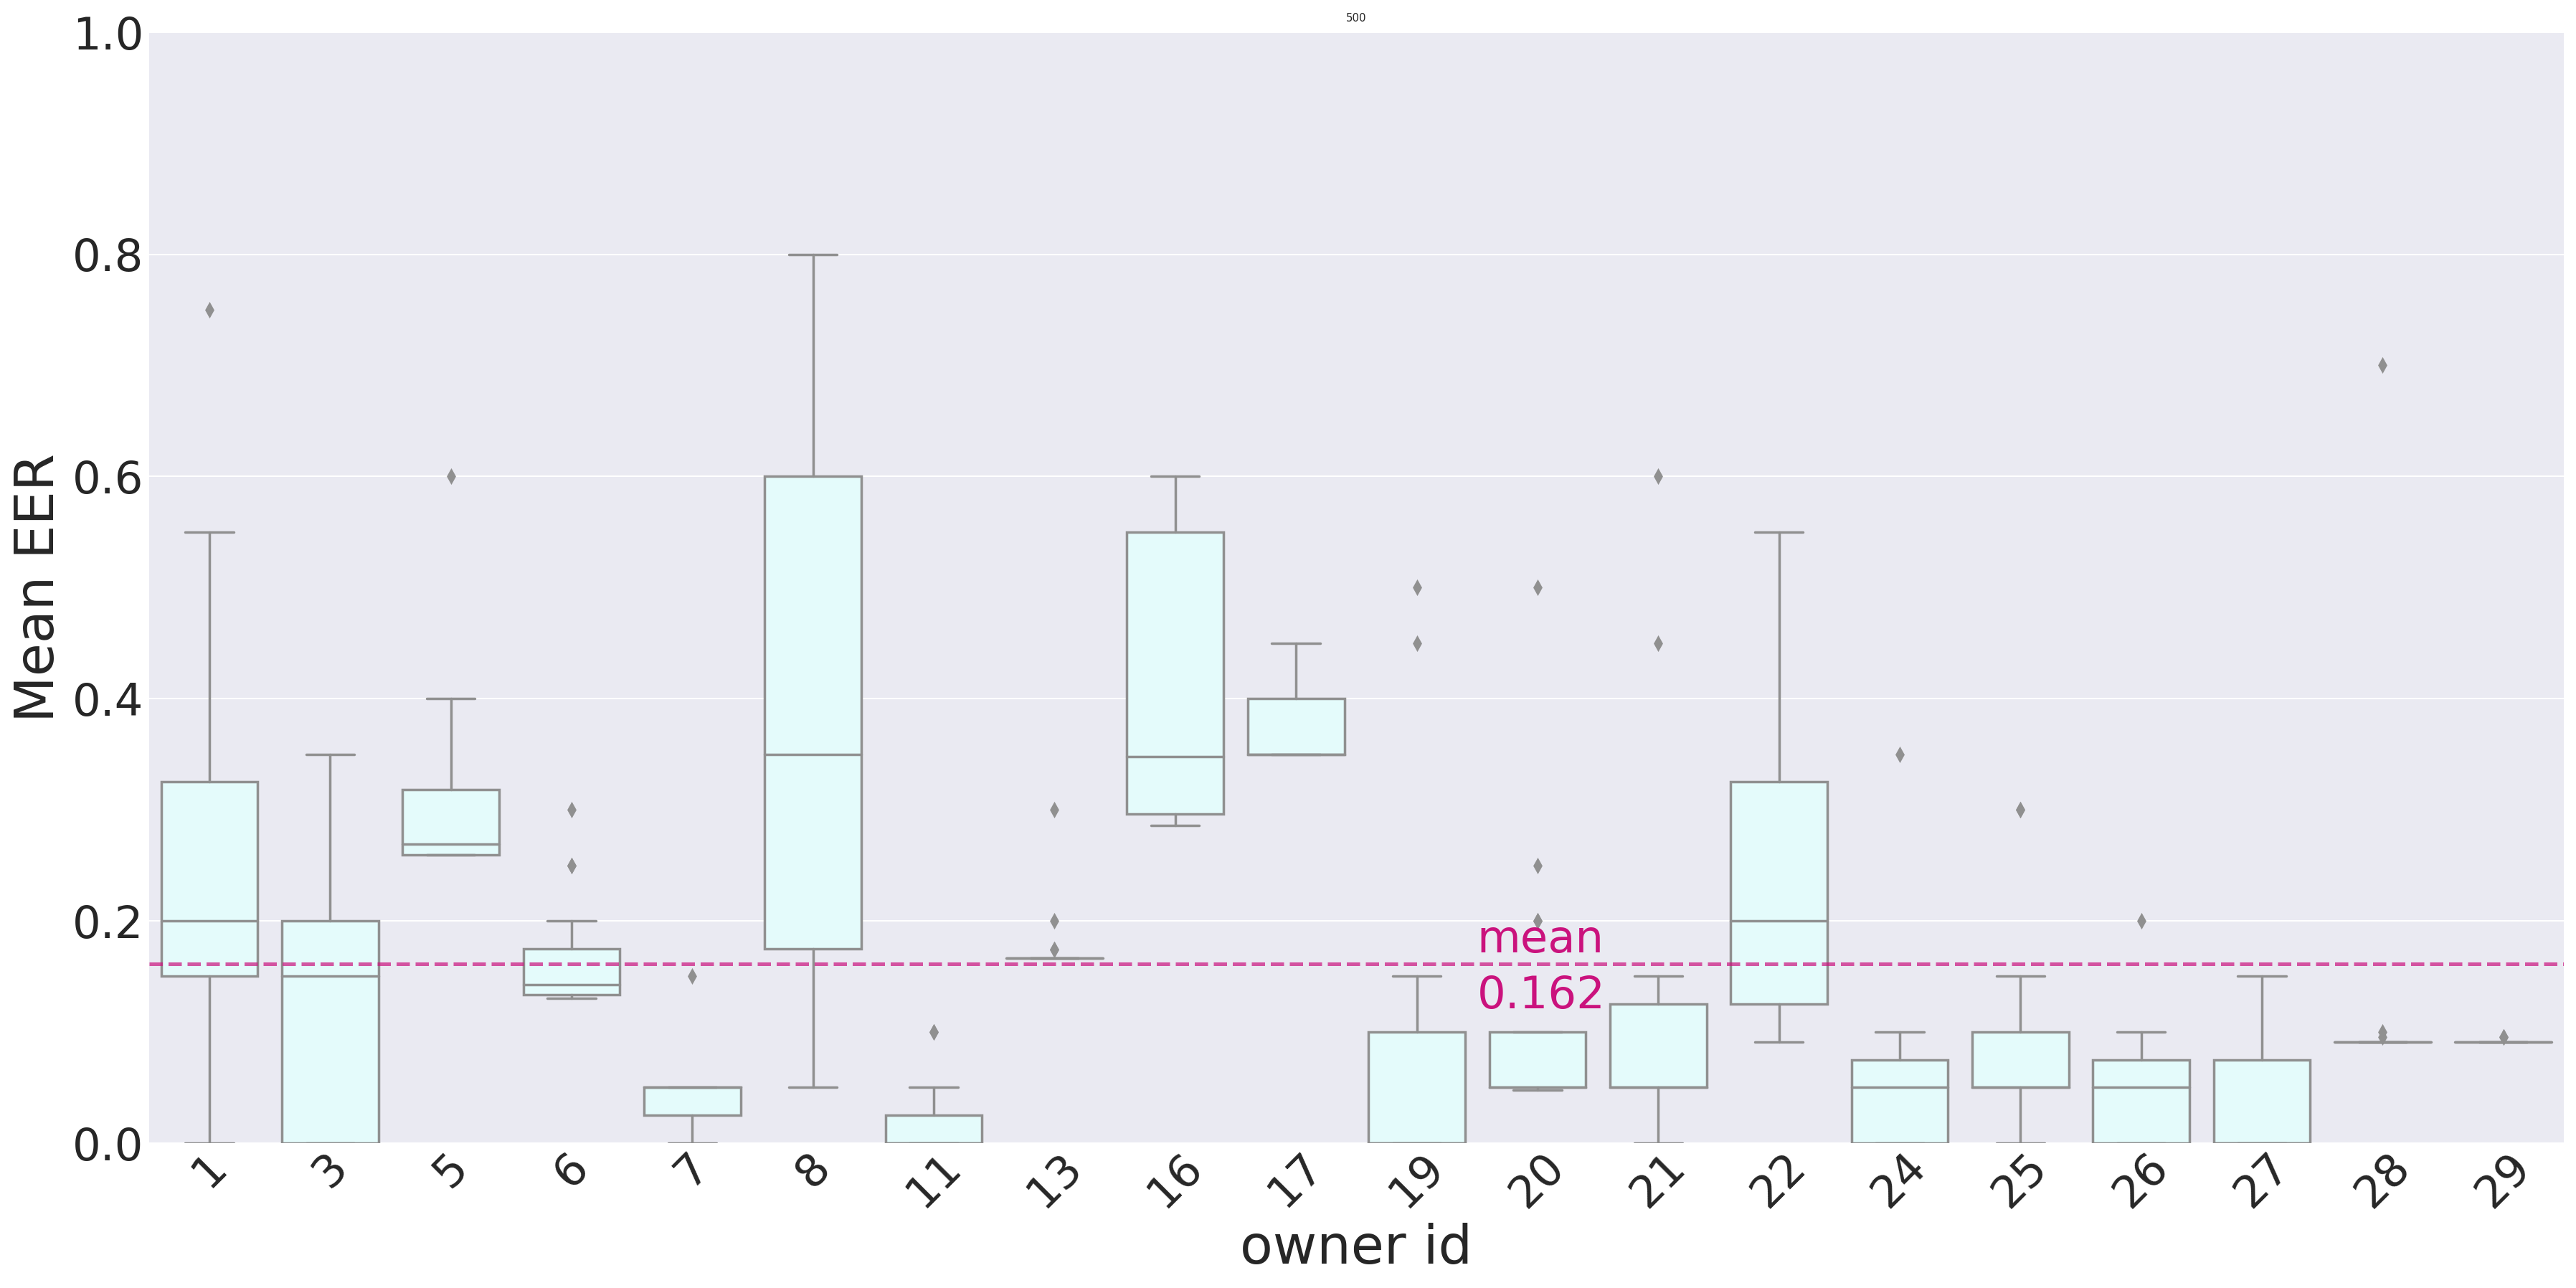

In [192]:
utils_plot_acc_eer_dist_thesis(EER_distro_df, "EER", 500, save_file_name=None, boxplot_color="lightcyan")


Overall mean: 0.1616


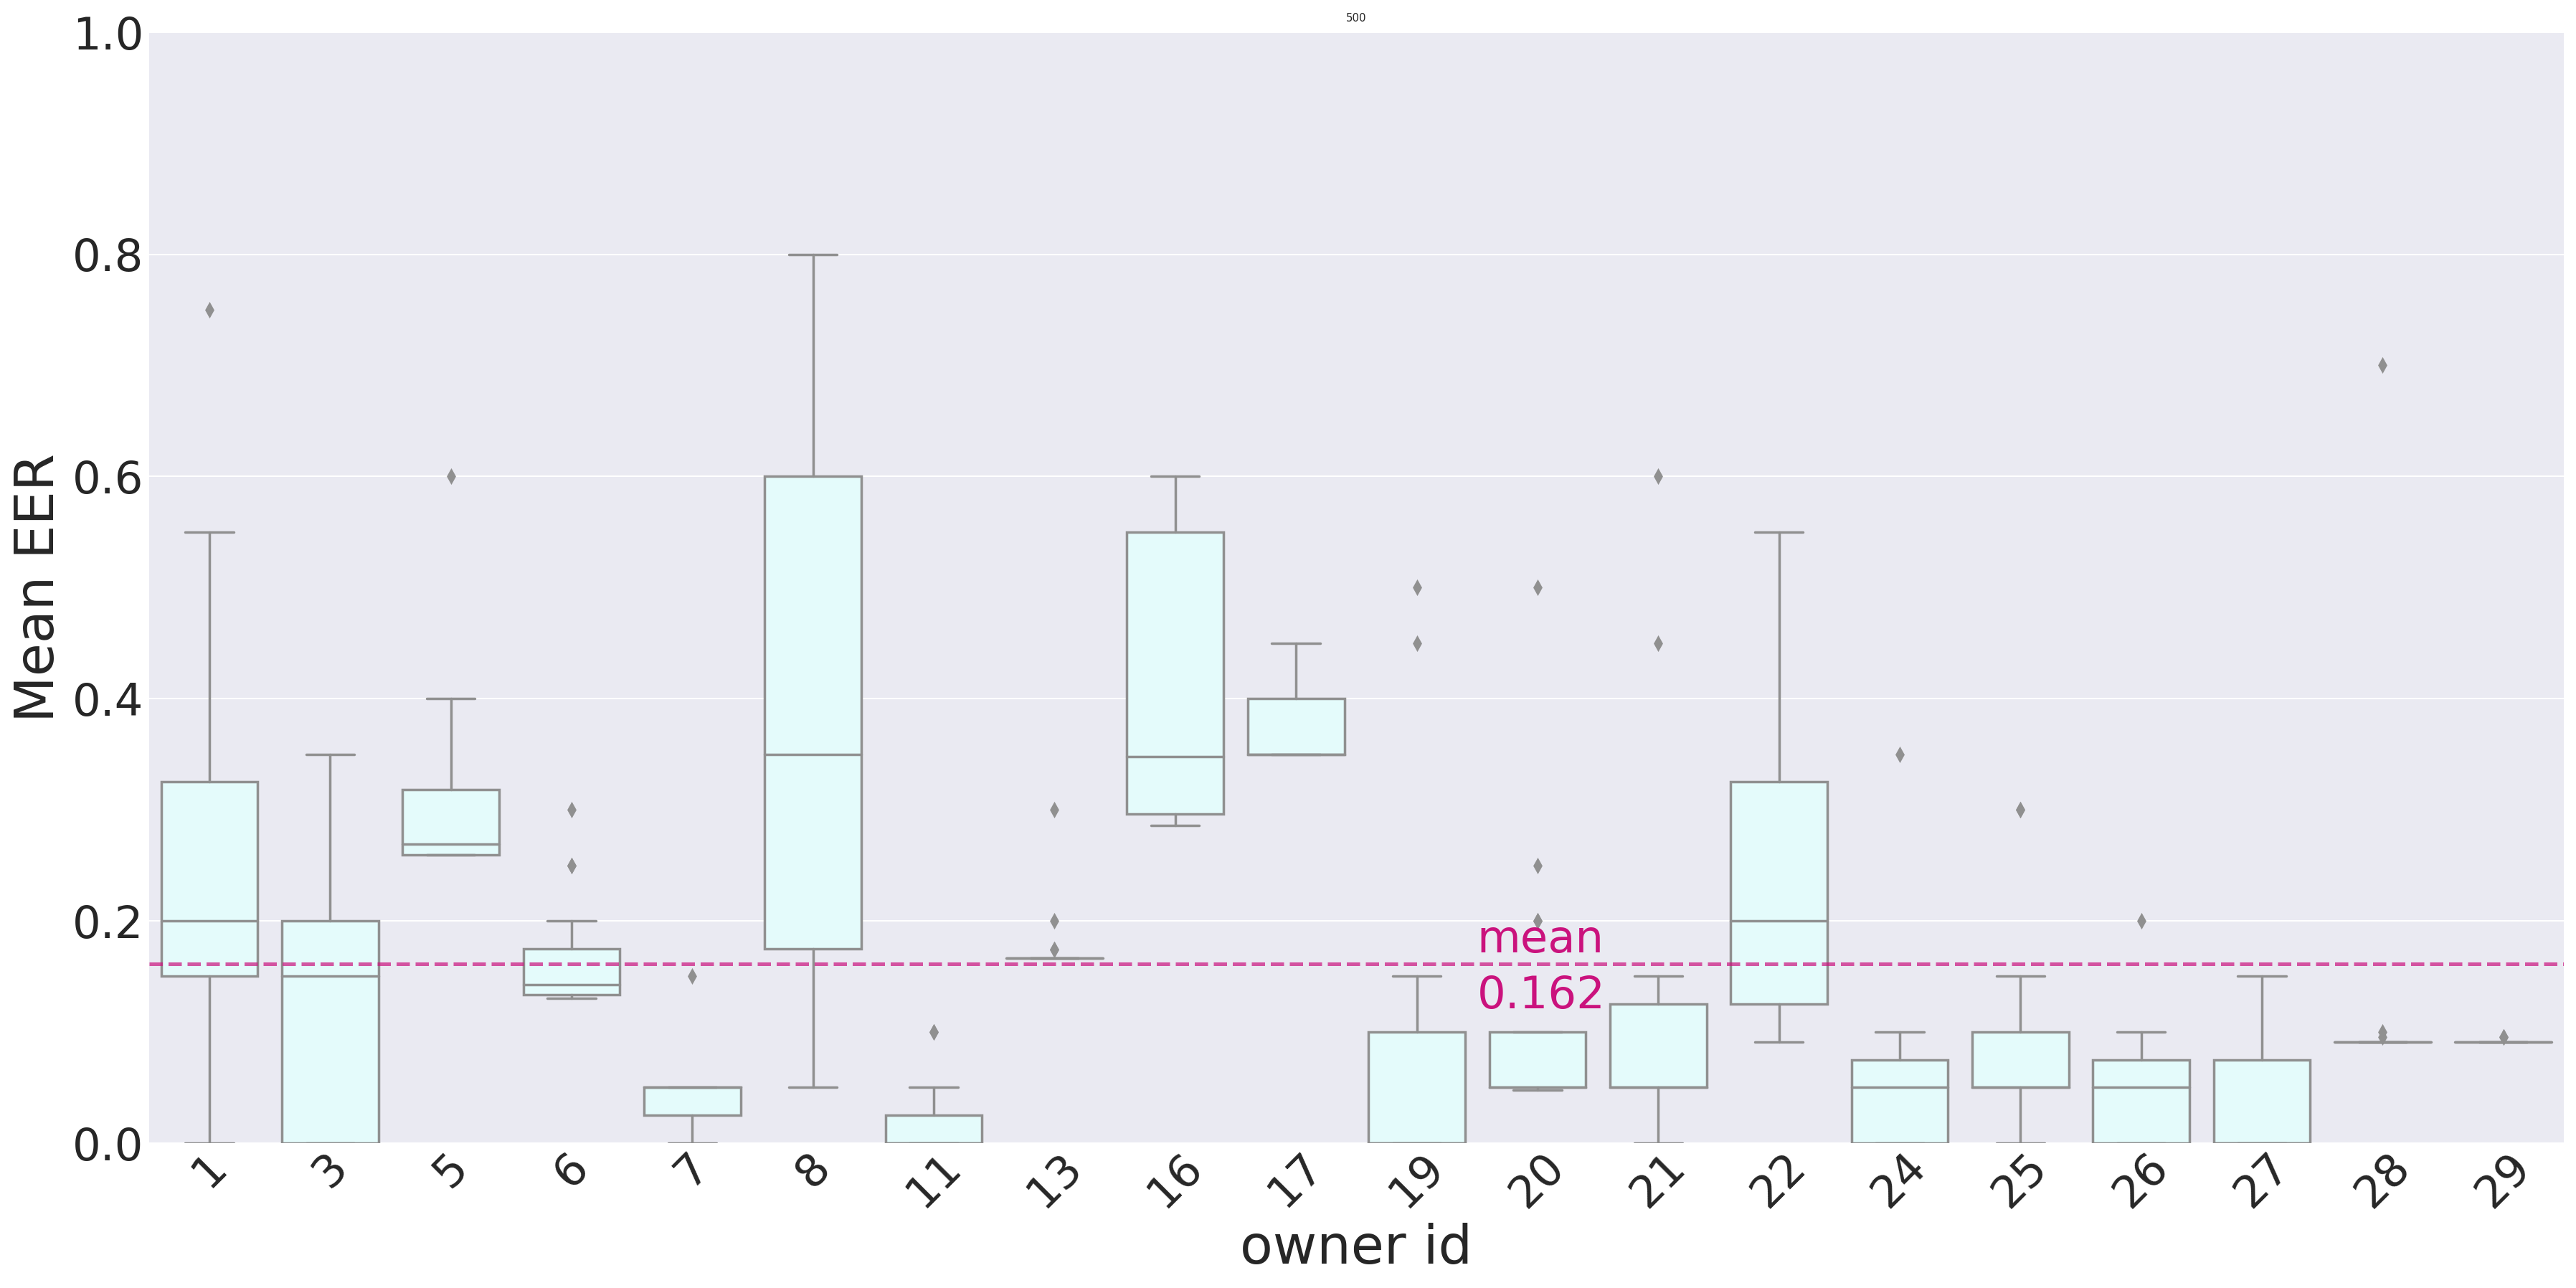

In [193]:
# utils_plot_acc_eer_dist_thesis(EER_distro_df[1]["window_size: 2000, step_width: 1000"], "EER", 500, save_file_name=None, boxplot_color="lightcyan")
utils_plot_acc_eer_dist_thesis(EER_distro_df, "EER", 500, save_file_name=None, boxplot_color="lightcyan")


In [194]:
P.scaler
P.scaler=None

In [195]:
# len(EER_distro_df[EER_distro_df.owner==29])

n_neighbors_params=[1]
P.Butter_per_win_argdict={
                        "filter_order": 10,
                        "cut_off_freq": 49,
                        "sampling_freq": 100,
                        "filtfilt": 1,
                        }
P.EMA_per_win_span=None
P.SMA_per_win_winsize=None
P.Butter_per_win_argdict=None
EER_distro_df=calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst=[2000], 
                                                            train_set=train_set, exp_config=P, extract_features_func=extract_WACA_features, overlap=.5, n_neighbors_params=n_neighbors_params)

# best_param_df=pd.DataFrame([[2000, 19]], columns=["window_size", "best_n_neighbors"])
# EER_distro_df=calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst=[2000], test_set=test_set, exp_config=P, overlap=.5, best_param_df=best_param_df)

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.8s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.9s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    1.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.4s remaining:    1.4

100%|██████████| 1/1 [00:08<00:00,  9.00s/it]


In [196]:
P.Butter_per_win_argdict={
                        "filter_order": 10,
                        "cut_off_freq": 49,
                        "sampling_freq": 100,
                        "filtfilt": 1,
                        }
P.EMA_per_win_span=None
P.SMA_per_win_winsize=None
type(dfList_exp1)

list

In [197]:
np.arange(1,20) 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

# 1. Butterworth frequency Cut-off

## 1.1 Naive Approach
### Optimizing and Testing

In [30]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "Butterworth"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Naive"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None

filter_order=10
sampling_freq=100
filtfilt=1

overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}
for cut_off_freq in tqdm(list(range(48, 50))):
    P.cut_off_freq=cut_off_freq
    print(f"cut_off_freq: {P.cut_off_freq}")

    
    ffted_dfList_exp1 = get_ffted_dfList(raw_dfList_exp1, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    
    ffted_dfList_exp1_user_47 = get_ffted_dfList(raw_dfList_exp1_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    ffted_dfList_exp2_user_47 = get_ffted_dfList(raw_dfList_exp2_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)

    
    dfList_dict={
                "dfList_exp1": ffted_dfList_exp1,
                "dfList_exp2": ffted_dfList_exp2,
                "dfList_exp1_user_47": ffted_dfList_exp1_user_47,
                "dfList_exp2_user_47": ffted_dfList_exp2_user_47
    }
    

    EER_df_train_dict[P.cut_off_freq] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                                    extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                                    n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[P.cut_off_freq] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                                extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                best_param_df=EER_df_train_dict[P.cut_off_freq])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq: {P.cut_off_freq}\n")
        f.write(EER_df_train_dict[P.cut_off_freq].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq: {P.cut_off_freq}\n")
        f.write(EER_df_test_dict[P.cut_off_freq].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["cut_off_freq"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


  0%|          | 0/2 [00:00<?, ?it/s]

cut_off_freq: 48
ERROR! Session/line number was not unique in database. History logging moved to new session 860



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
MakeWACAXExpDicOwner Time:  3.580242656171322
MakeWACAXExpDicUnknown Time:  7.231602409854531
Done extracting features



100%|██████████| 1/1 [00:25<00:00, 25.70s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
MakeWACAXExpDicOwner Time:  0.6443977523595095
MakeWACAXExpDicUnknown Time:  3.2166116032749414
Done extracting features



 50%|█████     | 1/2 [00:31<00:31, 31.59s/it]

cut_off_freq: 49



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
MakeWACAXExpDicOwner Time:  2.560160944238305
MakeWACAXExpDicUnknown Time:  7.293861903250217
Done extracting features



100%|██████████| 1/1 [00:24<00:00, 24.94s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
MakeWACAXExpDicOwner Time:  0.828005637973547



100%|██████████| 1/1 [00:04<00:00,  4.52s/it]

MakeWACAXExpDicUnknown Time:  3.3142175003886223
Done extracting features



100%|██████████| 2/2 [01:02<00:00, 31.34s/it]


## 1.2 Realworld Approach (per unknown window application of filter)
### Optimizing and Testing

In [199]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "Butterworth"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Realworld-per_unknown_window"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None

filter_order=10
sampling_freq=100
filtfilt=1

P.Butter_per_win_argdict={
    "filter_order": filter_order,
    "cut_off_freq": None,
    "sampling_freq": sampling_freq,
    "filtfilt": filtfilt,
    }

overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}

for cut_off_freq in tqdm(list(range(48, 50))):
    P.cut_off_freq=cut_off_freq
    P.Butter_per_win_argdict["cut_off_freq"]=cut_off_freq
    print(f"cut_off_freq: {P.cut_off_freq}")

    
    ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    
    ffted_dfList_exp2_user_47 = get_ffted_dfList(raw_dfList_exp2_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)

    
    dfList_dict={
                "dfList_exp1": raw_dfList_exp1,
                "dfList_exp2": ffted_dfList_exp2,
                "dfList_exp1_user_47": raw_dfList_exp1_user_47,
                "dfList_exp2_user_47": ffted_dfList_exp2_user_47
    }
    

    EER_df_train_dict[P.cut_off_freq] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                                    extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                                    n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[P.cut_off_freq] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                                 extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                 best_param_df=EER_df_train_dict[P.cut_off_freq])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq: {P.cut_off_freq}\n")
        f.write(EER_df_train_dict[P.cut_off_freq].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq: {P.cut_off_freq}\n")
        f.write(EER_df_test_dict[P.cut_off_freq].to_string())



mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["cut_off_freq"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


  0%|          | 0/2 [00:00<?, ?it/s]

cut_off_freq: 48



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.2s remaining:    1.2


100%|██████████| 1/1 [00:27<00:00, 27.20s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
MakeWACAXExpDicOwner Time:  0.6990433540195227
[Parallel(n_job


 50%|█████     | 1/2 [00:34<00:34, 34.41s/it]

cut_off_freq: 49



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.2s remaining:    1.2


100%|██████████| 1/1 [00:27<00:00, 27.35s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
MakeWACAXExpDicOwner Time:  0.626326147466898
[Parallel(n_jobs


100%|██████████| 2/2 [01:08<00:00, 34.28s/it]


# 2. Butterworth frequency Cut-off + EMA span
## 2.1 Naive Approach
### Optimizing and Testing

In [200]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "Butter+EMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Naive"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    
indices = list(range(1, 50))
mesh = np.array(np.meshgrid(indices, indices))
index_pairs = mesh.T.reshape(-1, 2)
choice_num=240
print(f"total cut_off_span_pairs: {index_pairs.shape}, choice_num: {choice_num}")
cut_off_span_pairs = index_pairs[np.random.choice(index_pairs.shape[0], size=240, replace=False), :]

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None

filter_order=10
sampling_freq=100
filtfilt=1

overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}

for key_pair in tqdm(cut_off_span_pairs[-2:]):
    
    key_pair = tuple(key_pair)
    cut_off_freq, span = key_pair[0], key_pair[1]
    P.cut_off_freq=cut_off_freq
    P.span=span
    print(f"cut_off_freq: {P.cut_off_freq}")
    print(f"span: {P.span}")

    
    ffted_dfList_exp1 = get_ffted_dfList(raw_dfList_exp1, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)

    EMAed_dfList_exp1 = get_EMAed_dfList(ffted_dfList_exp1, span=P.span)
    EMAed_dfList_exp2 = get_EMAed_dfList(ffted_dfList_exp2, span=P.span)
    
    ffted_dfList_exp1_user_47 = get_ffted_dfList(raw_dfList_exp1_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    ffted_dfList_exp2_user_47 = get_ffted_dfList(raw_dfList_exp2_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)

    EMAed_dfList_exp1_user_47 = get_EMAed_dfList(ffted_dfList_exp1_user_47, span=P.span)
    EMAed_dfList_exp2_user_47 = get_EMAed_dfList(ffted_dfList_exp2_user_47, span=P.span)
    
    dfList_dict={
                "dfList_exp1": EMAed_dfList_exp1,
                "dfList_exp2": EMAed_dfList_exp2,
                "dfList_exp1_user_47": EMAed_dfList_exp1_user_47,
                "dfList_exp2_user_47": EMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[key_pair] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                                                                  extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                                                                  n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[key_pair] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                                                               extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                                               best_param_df=EER_df_train_dict[key_pair])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, span: {key_pair}\n")
        f.write(EER_df_train_dict[key_pair].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, span: {key_pair}\n")
        f.write(EER_df_test_dict[key_pair].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["cut_off_freq", "EMA_span"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]
total cut_off_span_pairs: (2401, 2), choice_num: 240


  0%|          | 0/2 [00:00<?, ?it/s]

cut_off_freq: 38
span: 4



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.4s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:21<00:00, 21.92s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
MakeWACAXExpDicOwner Time:  0.7342462791129947
[Parallel(n_job


 50%|█████     | 1/2 [00:27<00:27, 27.13s/it]

cut_off_freq: 29
span: 13



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.5s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:21<00:00, 21.46s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
MakeWACAXExpDicOwner Time:  0.7204386787489057
[Parallel(n_job


100%|██████████| 2/2 [00:53<00:00, 26.92s/it]


## 2.2 Realworld Approach (per unknown window application of filter)
### Optimizing and Testing

In [201]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "Butter+EMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Realworld-per_unknown_window"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    
indices = list(range(1, 50))
mesh = np.array(np.meshgrid(indices, indices))
index_pairs = mesh.T.reshape(-1, 2)
choice_num=240
print(f"total cut_off_span_pairs: {index_pairs.shape}, choice_num: {choice_num}")
cut_off_span_pairs = index_pairs[np.random.choice(index_pairs.shape[0], size=240, replace=False), :]

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None

filter_order=10
sampling_freq=100
filtfilt=1
P.Butter_per_win_argdict={
    "filter_order": filter_order,
    "cut_off_freq": None,
    "sampling_freq": sampling_freq,
    "filtfilt": filtfilt,
    }

overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}

for key_pair in tqdm(cut_off_span_pairs[-2:]):
    key_pair = tuple(key_pair)
    cut_off_freq, span = key_pair[0], key_pair[1]
    P.cut_off_freq=cut_off_freq
    P.Butter_per_win_argdict["cut_off_freq"]=cut_off_freq
    
    
    P.span=span
    P.EMA_per_win_span=span

    print(f"cut_off_freq: {P.cut_off_freq}")
    print(f"span: {P.span}")

    ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    EMAed_dfList_exp2 = get_EMAed_dfList(ffted_dfList_exp2, span=P.span)
    
    ffted_dfList_exp2_user_47 = get_ffted_dfList(raw_dfList_exp2_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    EMAed_dfList_exp2_user_47 = get_EMAed_dfList(ffted_dfList_exp2_user_47, span=P.span)
    
    dfList_dict={
                "dfList_exp1": raw_dfList_exp1,
                "dfList_exp2": EMAed_dfList_exp2,
                "dfList_exp1_user_47": raw_dfList_exp1_user_47,
                "dfList_exp2_user_47": EMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[key_pair] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                              extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                              n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[key_pair] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                           extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                           best_param_df=EER_df_train_dict[key_pair])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, span: {key_pair}\n")
        f.write(EER_df_train_dict[key_pair].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, span: {key_pair}\n")
        f.write(EER_df_test_dict[key_pair].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["cut_off_freq", "EMA_span"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]
total cut_off_span_pairs: (2401, 2), choice_num: 240


  0%|          | 0/2 [00:00<?, ?it/s]

cut_off_freq: 38
span: 4



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:27<00:00, 27.72s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
MakeWACAXExpDicOwner Time:  0.7419103775173426
[Parallel(n_job


 50%|█████     | 1/2 [00:34<00:34, 34.90s/it]

cut_off_freq: 29
span: 13



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.5s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:27<00:00, 27.30s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
MakeWACAXExpDicOwner Time:  0.6437706155702472
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished
MakeWACAXExpDicUnknown Time:  2.560670357197523
Done extracting features


100%|██████████| 2/2 [01:09<00:00, 34.54s/it]


# 3. EMA span
## 3.1 Naive Approach
### Optimizing and Testing

In [202]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "EMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Naive"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None


overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}
for span in tqdm(list(range(48, 50))):
    P.span=span
    print(f"EMA span: {P.span}")

    
    EMAed_dfList_exp1 = get_EMAed_dfList(raw_dfList_exp1, span=P.span)
    EMAed_dfList_exp2 = get_EMAed_dfList(raw_dfList_exp2, span=P.span)
    
    EMAed_dfList_exp1_user_47 = get_EMAed_dfList(raw_dfList_exp1_user_47, span=P.span)
    EMAed_dfList_exp2_user_47 = get_EMAed_dfList(raw_dfList_exp2_user_47, span=P.span)

    
    dfList_dict={
                "dfList_exp1": EMAed_dfList_exp1,
                "dfList_exp2": EMAed_dfList_exp2,
                "dfList_exp1_user_47": EMAed_dfList_exp1_user_47,
                "dfList_exp2_user_47": EMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[P.span] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                            extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                            n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[P.span] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                         extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                         best_param_df=EER_df_train_dict[P.span])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\EMA span: {P.span}\n")
        f.write(EER_df_train_dict[P.span].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\EMA span: {P.span}\n")
        f.write(EER_df_test_dict[P.span].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["EMA_span"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


  0%|          | 0/2 [00:00<?, ?it/s]

EMA span: 48



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.4s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:22<00:00, 22.17s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
MakeWACAXExpDicOwner Time:  0.6194668654352427
[Parallel(n_job


 50%|█████     | 1/2 [00:25<00:25, 25.83s/it]

EMA span: 49



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:21<00:00, 21.36s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
MakeWACAXExpDicOwner Time:  0.669492463581264
[Parallel(n_jobs


100%|██████████| 2/2 [00:50<00:00, 25.43s/it]

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished
MakeWACAXExpDicUnknown Time:  2.430043858475983
Done extracting features


## 3.2 Realworld Approach (per unknown window application of filter)
### Optimizing and Testing

In [203]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "EMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Realworld-per_unknown_window"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None

overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}
for span in tqdm(list(range(48, 50))):
    P.span=span
    print(f"EMA span: {P.span}")

    P.EMA_per_win_span=P.span

    EMAed_dfList_exp2 = get_EMAed_dfList(raw_dfList_exp2, span=P.span)
    
    EMAed_dfList_exp2_user_47 = get_EMAed_dfList(raw_dfList_exp2_user_47, span=P.span)

    
    dfList_dict={
                "dfList_exp1": raw_dfList_exp1,
                "dfList_exp2": EMAed_dfList_exp2,
                "dfList_exp1_user_47": raw_dfList_exp1_user_47,
                "dfList_exp2_user_47": EMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[P.span] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                            extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                            n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[P.span] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                         extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                         best_param_df=EER_df_train_dict[P.span])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\EMA span: {P.span}\n")
        f.write(EER_df_train_dict[P.span].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\EMA span: {P.span}\n")
        f.write(EER_df_test_dict[P.span].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["EMA_span"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


  0%|          | 0/2 [00:00<?, ?it/s]

EMA span: 48



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:23<00:00, 23.86s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
MakeWACAXExpDicOwner Time:  0.6054787682369351
[Parallel(n_job


 50%|█████     | 1/2 [00:27<00:27, 27.97s/it]

EMA span: 49



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.1s remaining:    1.1


100%|██████████| 1/1 [00:23<00:00, 23.67s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
MakeWACAXExpDicOwner Time:  0.6150868171826005
[Parallel(n_job


100%|██████████| 2/2 [00:55<00:00, 27.92s/it]


# 4. SMA winsize
## 4.1 Naive Approach
### Optimizing and Testing

In [204]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "SMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Naive"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None


overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}
for winsize in tqdm(list(range(48, 50))):
    P.winsize=winsize
    print(f"SMA winsize: {P.winsize}")


    SMAed_dfList_exp1 = get_SMAed_dfList(raw_dfList_exp1, winsize=P.winsize)
    SMAed_dfList_exp2 = get_SMAed_dfList(raw_dfList_exp2, winsize=P.winsize)
    
    SMAed_dfList_exp1_user_47 = get_SMAed_dfList(raw_dfList_exp1_user_47, winsize=P.winsize)
    SMAed_dfList_exp2_user_47 = get_SMAed_dfList(raw_dfList_exp2_user_47, winsize=P.winsize)

    
    dfList_dict={
                "dfList_exp1": SMAed_dfList_exp1,
                "dfList_exp2": SMAed_dfList_exp2,
                "dfList_exp1_user_47": SMAed_dfList_exp1_user_47,
                "dfList_exp2_user_47": SMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[P.winsize] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                               extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                               n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[P.winsize] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                            extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                            best_param_df=EER_df_train_dict[P.winsize])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\SMA winsize: {P.winsize}\n")
        f.write(EER_df_train_dict[P.winsize].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\SMA winsize: {P.winsize}\n")
        f.write(EER_df_test_dict[P.winsize].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["SMA_winsize"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


  0%|          | 0/2 [00:00<?, ?it/s]

SMA winsize: 48



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.2s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.8s remaining:    1.8


100%|██████████| 1/1 [00:24<00:00, 24.03s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
MakeWACAXExpDicOwner Time:  0.7823008932173252
[Parallel(n_job


100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
MakeWACAXExpDicUnknown Time:  2.490754997357726
Done extracting features



 50%|█████     | 1/2 [00:27<00:27, 27.99s/it]

SMA winsize: 49



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.7s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.9s remaining:    1.9


100%|██████████| 1/1 [00:24<00:00, 24.60s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
MakeWACAXExpDicOwner Time:  0.8431148733943701
[Parallel(n_job


100%|██████████| 2/2 [00:56<00:00, 28.37s/it]


## 4.2 Realworld Approach (per unknown window application of filter)
### Optimizing and Testing

In [205]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "SMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Realworld-per_unknown_window"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None


overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}
for winsize in tqdm(list(range(48, 50))):
    P.winsize=winsize
    P.SMA_per_win_winsize=P.winsize

    print(f"SMA winsize: {P.winsize}")


    SMAed_dfList_exp2 = get_SMAed_dfList(raw_dfList_exp2, winsize=P.winsize)
    
    SMAed_dfList_exp2_user_47 = get_SMAed_dfList(raw_dfList_exp2_user_47, winsize=P.winsize)

    
    dfList_dict={
                "dfList_exp1": raw_dfList_exp1,
                "dfList_exp2": SMAed_dfList_exp2,
                "dfList_exp1_user_47": raw_dfList_exp1_user_47,
                "dfList_exp2_user_47": SMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[P.winsize] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                               extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                               n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[P.winsize] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                            extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                            best_param_df=EER_df_train_dict[P.winsize])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\SMA winsize: {P.winsize}\n")
        f.write(EER_df_train_dict[P.winsize].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\SMA winsize: {P.winsize}\n")
        f.write(EER_df_test_dict[P.winsize].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["SMA_winsize"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


  0%|          | 0/2 [00:00<?, ?it/s]

SMA winsize: 48



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    0.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.4s remaining:    1.4


100%|██████████| 1/1 [00:26<00:00, 26.43s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
MakeWACAXExpDicOwner Time:  0.8387133153155446
[Parallel(n_job


 50%|█████     | 1/2 [00:30<00:30, 30.90s/it]

SMA winsize: 49



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.5s remaining:    1.5


100%|██████████| 1/1 [00:26<00:00, 26.45s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
MakeWACAXExpDicOwner Time:  0.773369119502604
[Parallel(n_jobs


100%|██████████| 2/2 [01:01<00:00, 30.80s/it]


# 5. Butterworth frequency Cut-off + SMA winsize
## 5.1 Naive Approach
### Optimizing and Testin

In [206]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "Butter+SMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Naive"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    
indices = list(range(1, 50))
mesh = np.array(np.meshgrid(indices, indices))
index_pairs = mesh.T.reshape(-1, 2)
choice_num=240
print(f"total cut_off_winsize_pairs: {index_pairs.shape}, choice_num: {choice_num}")
cut_off_winsize_pairs = index_pairs[np.random.choice(index_pairs.shape[0], size=240, replace=False), :]

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None

filter_order=10
sampling_freq=100
filtfilt=1

overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}

for key_pair in tqdm(cut_off_winsize_pairs[-2:]):
    
    key_pair = tuple(key_pair)
    cut_off_freq, winsize = key_pair[0], key_pair[1]
    P.cut_off_freq=cut_off_freq
    P.winsize=winsize
    print(f"cut_off_freq: {P.cut_off_freq}")
    print(f"winsize: {P.winsize}")

    
    ffted_dfList_exp1 = get_ffted_dfList(raw_dfList_exp1, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)

    SMAed_dfList_exp1 = get_SMAed_dfList(ffted_dfList_exp1, winsize=P.winsize)
    SMAed_dfList_exp2 = get_SMAed_dfList(ffted_dfList_exp2, winsize=P.winsize)
    
    ffted_dfList_exp1_user_47 = get_ffted_dfList(raw_dfList_exp1_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    ffted_dfList_exp2_user_47 = get_ffted_dfList(raw_dfList_exp2_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)

    SMAed_dfList_exp1_user_47 = get_SMAed_dfList(ffted_dfList_exp1_user_47, winsize=P.winsize)
    SMAed_dfList_exp2_user_47 = get_SMAed_dfList(ffted_dfList_exp2_user_47, winsize=P.winsize)
    
    dfList_dict={
                "dfList_exp1": SMAed_dfList_exp1,
                "dfList_exp2": SMAed_dfList_exp2,
                "dfList_exp1_user_47": SMAed_dfList_exp1_user_47,
                "dfList_exp2_user_47": SMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[key_pair] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                              extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                              n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[key_pair] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                           extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                           best_param_df=EER_df_train_dict[key_pair])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, winsize: {key_pair}\n")
        f.write(EER_df_train_dict[key_pair].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, winsize: {key_pair}\n")
        f.write(EER_df_test_dict[key_pair].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["cut_off_freq", "SMA_winsize"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]
total cut_off_winsize_pairs: (2401, 2), choice_num: 240


  0%|          | 0/2 [00:00<?, ?it/s]

cut_off_freq: 38
winsize: 4



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.9s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.6s remaining:    1.6


100%|██████████| 1/1 [00:22<00:00, 22.77s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
MakeWACAXExpDicOwner Time:  0.7333458736538887
[Parallel(n_job


 50%|█████     | 1/2 [00:28<00:28, 28.27s/it]

cut_off_freq: 29
winsize: 13



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.9s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    1.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.7s remaining:    1.7


100%|██████████| 1/1 [00:23<00:00, 23.00s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
MakeWACAXExpDicOwner Time:  0.7779667777940631
[Parallel(n_job


100%|██████████| 2/2 [00:56<00:00, 28.34s/it]


In [207]:
tuple(key_pair)

(29, 13)

## 5.2 Realworld Approach (per unknown window application of filter)
### Optimizing and Testing

In [208]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")
P.smoothing = "Butter+SMA"


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
preprocessing_method="Realworld-per_unknown_window"
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/{P.smoothing}_Mean_EER_{preprocessing_method}_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    
indices = list(range(1, 50))
mesh = np.array(np.meshgrid(indices, indices))
index_pairs = mesh.T.reshape(-1, 2)
choice_num=240
print(f"total cut_off_winsize_pairs: {index_pairs.shape}, choice_num: {choice_num}")
cut_off_winsize_pairs = index_pairs[np.random.choice(index_pairs.shape[0], size=240, replace=False), :]

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None


filter_order=10
sampling_freq=100
filtfilt=1
P.Butter_per_win_argdict={
    "filter_order": filter_order,
    "cut_off_freq": None,
    "sampling_freq": sampling_freq,
    "filtfilt": filtfilt,
    }

overlap=0.5
EER_df_train_dict={}
EER_df_test_dict={}

for key_pair in tqdm(cut_off_winsize_pairs[-2:]):
    
    key_pair = tuple(key_pair)
    cut_off_freq, winsize = key_pair[0], key_pair[1]
    P.cut_off_freq=cut_off_freq
    P.Butter_per_win_argdict["cut_off_freq"]=P.cut_off_freq
    P.winsize=winsize
    
    print(f"cut_off_freq: {P.cut_off_freq}")
    print(f"winsize: {P.winsize}")

    
    ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    SMAed_dfList_exp2 = get_SMAed_dfList(ffted_dfList_exp2, winsize=P.winsize)
    
    ffted_dfList_exp2_user_47 = get_ffted_dfList(raw_dfList_exp2_user_47, cut_off_freq=P.cut_off_freq, filter_order=filter_order, sampling_freq=sampling_freq, filtfilt=filtfilt)
    SMAed_dfList_exp2_user_47 = get_SMAed_dfList(ffted_dfList_exp2_user_47, winsize=P.winsize)
    
    dfList_dict={
                "dfList_exp1": raw_dfList_exp1,
                "dfList_exp2": SMAed_dfList_exp2,
                "dfList_exp1_user_47": raw_dfList_exp1_user_47,
                "dfList_exp2_user_47": SMAed_dfList_exp2_user_47
    }
    

    EER_df_train_dict[key_pair] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                              extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                              n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[key_pair] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                           extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                           best_param_df=EER_df_train_dict[key_pair])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, winsize: {key_pair}\n")
        f.write(EER_df_train_dict[key_pair].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\cut_off_freq, winsize: {key_pair}\n")
        f.write(EER_df_test_dict[key_pair].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["cut_off_freq", "SMA_winsize"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------

mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]
total cut_off_winsize_pairs: (2401, 2), choice_num: 240


  0%|          | 0/2 [00:00<?, ?it/s]

cut_off_freq: 38
winsize: 4



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.7s remaining:    1.7


100%|██████████| 1/1 [00:28<00:00, 28.36s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
MakeWACAXExpDicOwner Time:  0.8821517024189234
[Parallel(n_job


 50%|█████     | 1/2 [00:35<00:35, 35.61s/it]

cut_off_freq: 29
winsize: 13



  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 20
len_exp2_user_47: 17
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    0.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    1.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   6 out of  20 | elapsed:    1.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    1.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.7s remaining:    1.7


100%|██████████| 1/1 [00:28<00:00, 28.19s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 10
len(exp2_df_user_set_dict): 10
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
MakeWACAXExpDicOwner Time:  0.7367365416139364
[Parallel(n_job


100%|██████████| 2/2 [01:10<00:00, 35.29s/it]


In [44]:
overlap*=0.01

1980

# 6. The effect of Varying Overlap

In [24]:
print(f"train_set: {train_set+[47]}")
print(f"test_set: {test_set}")


window_size_lst = [2000]#[125, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
time_of_execution = time.strftime("%Y/%m/%d-%H:%M:%S")
train_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/overlap_Mean_EER_df_train_dict.txt"
test_file_name=f"{FINAL_EXP_RESULTS_PATH}/{exp_path_name}/overlap_Mean_EER_df_test_dict.txt"
with open(train_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{train_file_name}" + "-"*40 + "\n")
    
with open(test_file_name, "w") as f:
    f.write("\n" + "-"*40 + f"{time_of_execution}" + "-"*40 + "\n")
    f.write("\n" + "-"*40 + f"{test_file_name}" + "-"*40 + "\n")
    
    

P.SMA_per_win_winsize=None
P.EMA_per_win_span=None
P.Butter_per_win_argdict=None
P.cut_off_freq=None
P.winsize=None
P.span=None


EER_df_train_dict={}
EER_df_test_dict={}
for overlap in tqdm(list(range(1, 100))):
    overlap*=0.01
    max_window_size=2000
    step_width = int(max_window_size * (1-overlap))
    max_num_windows=max(len(getIndices(sampleSize=max_window_size, step=step_width, numSamplePoints=P.num_sample_points_per_exp)), 100)
    n_neighbors_params = np.arange(1, max_num_windows) 
    
    dfList_dict={
                "dfList_exp1": raw_dfList_exp1,
                "dfList_exp2": raw_dfList_exp2,
                "dfList_exp1_user_47": raw_dfList_exp1_user_47,
                "dfList_exp2_user_47": raw_dfList_exp2_user_47
    }
    

    EER_df_train_dict[overlap] = calculate_EER_different_window_sizes_optimize_num_neighbors(dfList_dict, window_size_lst, train_set=train_set, exp_config=P, 
                                                                                             extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                                             n_neighbors_params=n_neighbors_params)

    EER_df_test_dict[overlap] = calculate_EER_different_window_sizes_test(dfList_dict, window_size_lst, test_set=test_set, exp_config=P, 
                                                                          extract_features_func=extract_WACA_features, overlap=overlap, 
                                                                          best_param_df=EER_df_train_dict[overlap])
        
    with open(train_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\overlap: {overlap}\n")
        f.write(EER_df_train_dict[overlap].to_string())

    
    with open(test_file_name, "a") as f:
        f.write("\n" + "-"*22 + "\n")
        f.write(f"\overlap: {overlap}\n")
        f.write(EER_df_test_dict[overlap].to_string())


        
mean_EER_train_dict={}
for key in EER_df_train_dict:
    mean_EER_train_dict[key] = EER_df_train_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_train_dict.items())
l.sort(key=lambda i: i[1])

with open(train_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")
        

#-------
key_column= ["overlap"]
EER_df_test_dict_df=make_raw_exp_df_results(EER_df_test_dict, key_column)
eer_per_window_size_col_df =make_eer_per_window_size_col_df(EER_df_test_dict_df, key_column, window_size_lst)

EER_df_test_dict_df.to_json(f'{test_file_name[:-4]}_raw_df.json')
eer_per_window_size_col_df.to_json(f'{test_file_name[:-4]}_eer_per_window_size_col_df.json')
#-------


mean_EER_test_dict={}
for key in EER_df_test_dict:
    mean_EER_test_dict[key] = EER_df_test_dict[key]["Mean_EER"].mean()
    
l = list(mean_EER_test_dict.items())
l.sort(key=lambda i: i[1])

with open(test_file_name, "a") as f:
    f.write("\n" + "-"*22 + "\n")
    f.write(f"\nSorting based on Mean EER among windows\n")
    for i in range(len(l)):
        f.write(f"{i+1}) {l[i]}\n")

train_set: [7, 24, 8, 11, 13, 19, 28, 21, 26, 3, 20, 22, 6, 25, 16, 1, 17, 27, 5, 47]
test_set: [0, 12, 14, 9, 18, 23, 2, 15, 10, 4]


  0%|          | 0/1 [00:00<?, ?it/s]

window_size: 2000
len(exp1_df_user_set_dict): 19
len(exp2_df_user_set_dict): 19
len(X_exp1_dict_user_47[47]): 476
len_exp2_user_47: 401


Process LokyProcess-16:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 451, in _process_worker
    _process_reference_size = _get_memory_usage(pid, force_gc=True)
  File "/opt/conda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py", line 117, in _get_memory_usage
    gc.collect()
KeyboardInterrupt
  0%|          | 0/2 [00:45<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
1

1